# Superdense coding

Based on [QBronze lab](https://gitlab.com/qworld/bronze-qiskit/-/blob/master/quantum-with-qiskit/Q72_Superdense_Coding.ipynb).

[Wikipedia article](https://en.wikipedia.org/wiki/Superdense_coding)

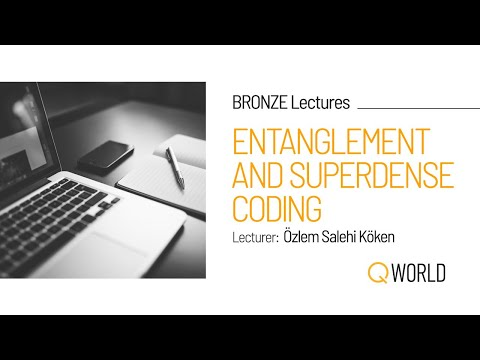

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZzRcItzUF2U')

### What is superdense coding? 

Quantum communication protocol to communicate a number of classical bits of information by only transmitting a **smaller number of qubits**.

But for this sender should receive pre-sharing an entangled resource.

Thus, the essense of the protocol we consider is:
* Share a $|\Phi^{+}\rangle$ Bell pair.
* Tranfer 2 bits of information by preparing one of 4 Bell basis states. This creates natural information protection (all Bell states are equal superpositions).
* Change the basis from Bell to $ZZ$ and measure.

![](https://upload.wikimedia.org/wikipedia/commons/b/b7/Superdense_coding.png)

## Protocol implementation

### Create a bell pair

NB! Qiskit uses multiplication-order qubit notation!

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
import matplotlib.pyplot as plt

qr = QuantumRegister(2, "q")     # quantum register with 2 qubits
cr = ClassicalRegister(2, "c")   # classical register with 2 bits
er = ClassicalRegister(1, "e")   # classical register with 1 bit for eavesdropper
qc = QuantumCircuit(qr, cr, er)  # quantum circuit with quantum and classical registers

In [3]:
# TODO prepare a bell state





qc.barrier()

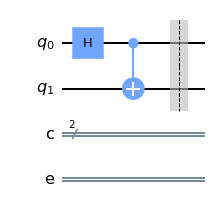

In [4]:
qc.draw(output='mpl')
plt.show()

### Send a qubit 1 to a reciever

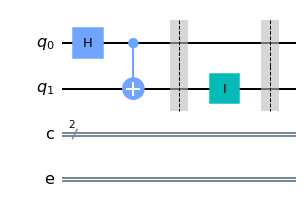

In [5]:
qc.i(qr[1]) # do nothing
qc.barrier()

qc.draw(output='mpl')
plt.show()

### Encode the message

In [6]:
### Use this to initialize different strings
message = "01"  # "00", "10", "11"

In [7]:
def encode(s, qc, qubit):
    b0 = int(s[0])
    b1 = int(s[1])
    # use X?Z? to encode this information
    # X changes Phi to Psi, Z changes + to -

    if b0:
        # TODO
        pass
        
        
    if b1:
        # TODO
        pass

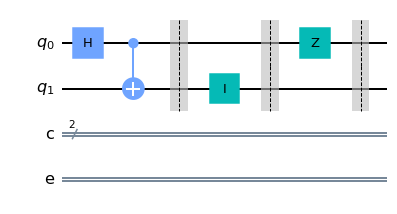

In [8]:
encode(message, qc, qr[0])
qc.barrier()
qc.draw(output='mpl')
plt.show()

### Here we can model and eavesdropper

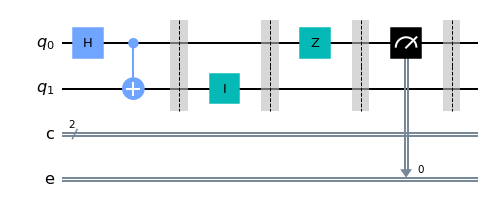

In [9]:
# Comment next line to stop eavesdropper from listening the channel
qc.measure(qr[0], er[0])

qc.barrier()
qc.draw(output='mpl')
plt.show()

### Send another qubit to a reciever

This qubit is exaclty what us "1 qubit brings 2 bits of information"

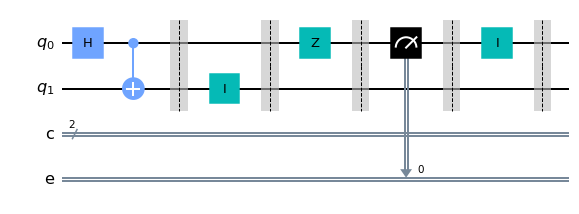

In [10]:
qc.i(qr[1])
qc.barrier()
qc.draw(output='mpl')
plt.show()

### Decode from Bell states to Z-basis

Write here the code which decodes states back to observables in ZZ. (Or in other words - measures in Bell's basis).

In [1]:
## TODO write your code


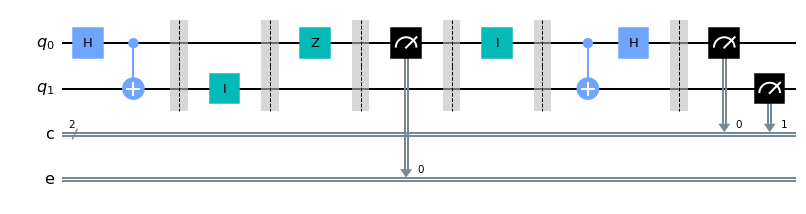

In [12]:
qc.barrier()
qc.measure(qr, cr)
qc.draw(output='mpl')
plt.show()

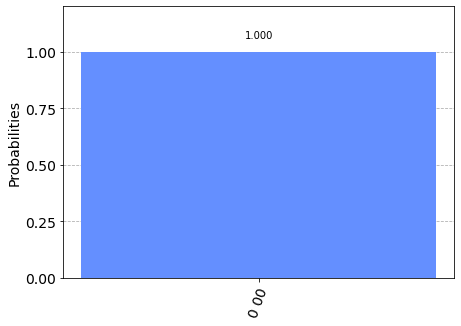

Result of my transfer is:  00


AssertionError: Values are different. Eavesdropping detected

In [18]:
from qiskit import execute, Aer
from qiskit.visualization import plot_histogram


job = execute(qc, Aer.get_backend('statevector_simulator'))
counts = job.result().get_counts(qc)

plot_histogram(counts)
plt.show()

eva, bob = list(counts.keys())[0].split()
print("Result of my transfer is: ", bob)

assert bob == message, "Values are different. Eavesdropping detected"